# Restaurant Market Research Project

### Introduction

In this project, we will process data of restaurants some market analysis. The goal is to find out whether an innovative restaurant with small robot waiters can maintain its success after its novelty wears off, or is it just a gimmick that will end.

### Step 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import usaddress

In [2]:
try:
    rest = pd.read_csv('rest_data_us.csv')
except:
    rest = pd.read_csv('/datasets/rest_data_us.csv')

Let's check the data.

In [3]:
rest.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [4]:
rest.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


Let's check if we can better utilize memory usage.

In [5]:
rest.chain.value_counts()

False    5972
True     3676
Name: chain, dtype: int64

**Note:**

I'm not sure that it's correct to change the data type of True/False values from object to category. I will leave it as is, and if necessary, I will change it in the second version. 

In [6]:
rest.object_type.value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

That's a classic case to change the data type from object to category. 

Let's go!🤘

In [7]:
rest.object_type = rest.object_type.astype('category')

In [8]:
rest.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


Nice! 

We decreased the memory usage from 2.4MB to 1.8MB.

**Missing Values**

In [9]:
rest.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

We see above, both with the info() method and isnull() method that there are 3 missing values in the **chain** column. 

Let's find these rows.

In [10]:
rest[rest['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Let's find the proportion of the missing values out of the entire data set.

In [11]:
rest.stb.missing(style=True)

,missing,total,percent
chain,3,"9,651",0.03%
id,0,"9,651",0.00%
object_name,0,"9,651",0.00%
address,0,"9,651",0.00%
object_type,0,"9,651",0.00%
number,0,"9,651",0.00%


So here we see that the percentage of the missing values is very small and insignificant - 0.03%. We can definitely drop the missing values.

In [12]:
rest.dropna(subset=['chain'], inplace = True)
rest.stb.missing(style=True)

,missing,total,percent
id,0,"9,648",0.00%
object_name,0,"9,648",0.00%
address,0,"9,648",0.00%
chain,0,"9,648",0.00%
object_type,0,"9,648",0.00%
number,0,"9,648",0.00%


Sweet!

We dropped all the missing values in the data set.🙌

Now Let's check for duplicates.

**Duplicates**

First, let's change the values of the data set to be with lowercase letters.

In [13]:
rest.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [14]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9648 non-null   int64   
 1   object_name  9648 non-null   object  
 2   address      9648 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9648 non-null   category
 5   number       9648 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 461.9+ KB


In [15]:
rest['object_name'] = rest['object_name'].str.lower()
rest['address'] = rest['address'].str.lower()
rest['object_type'] = rest['object_type'].str.lower()
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way # 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20


In [16]:
rest.duplicated().sum()

0

Yay!

No duplicates!


The data is clean and ready for analysis. 

Let's start.🤘

### Step 2. Data analysis

**1. Investigate the proportions of the various types of establishments. Plot a
graph.**

Let's create the right data set for this graph and then plott it.

In [17]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way # 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20


In [18]:
esta_grouped = rest.groupby('object_type')['id'].nunique().reset_index()
esta_grouped.columns = ['establishment', 'num']
esta_grouped = esta_grouped.sort_values(by='num', ascending = False)
esta_grouped

,establishment,num
5,restaurant,7253
3,fast food,1066
2,cafe,435
4,pizza,319
1,bar,292
0,bakery,283


Now let's plot the graph.✌️

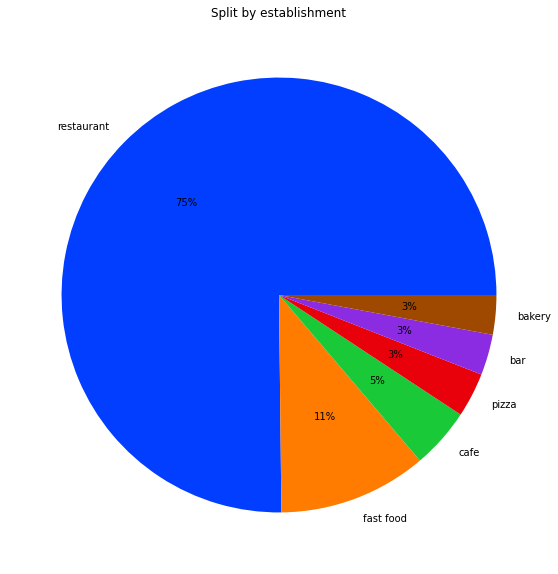

In [19]:
fig = plt.subplots(figsize=(15, 10))
plt.pie(esta_grouped['num'], labels = esta_grouped['establishment'], colors = sns.color_palette('bright'),
       autopct = '%0.0f%%')
plt.title("Split by establishment")
plt.show()

So here we see that restaurant is the most popular type of establishment in LA, followed by is the fast food, and then coffee houses. Pizza, bar, and bakery control the same low percentage of the market - only 3%. 

**2. Investigate the proportions of chain and nonchain establishments. Plot a
graph.**

First, let's create the relevant data for this question.

In [20]:
chain_grouped = rest.groupby('chain')['id'].nunique().reset_index()
chain_grouped.columns = ['chain', 'num']
chain_grouped

,chain,num
0,False,5972
1,True,3676


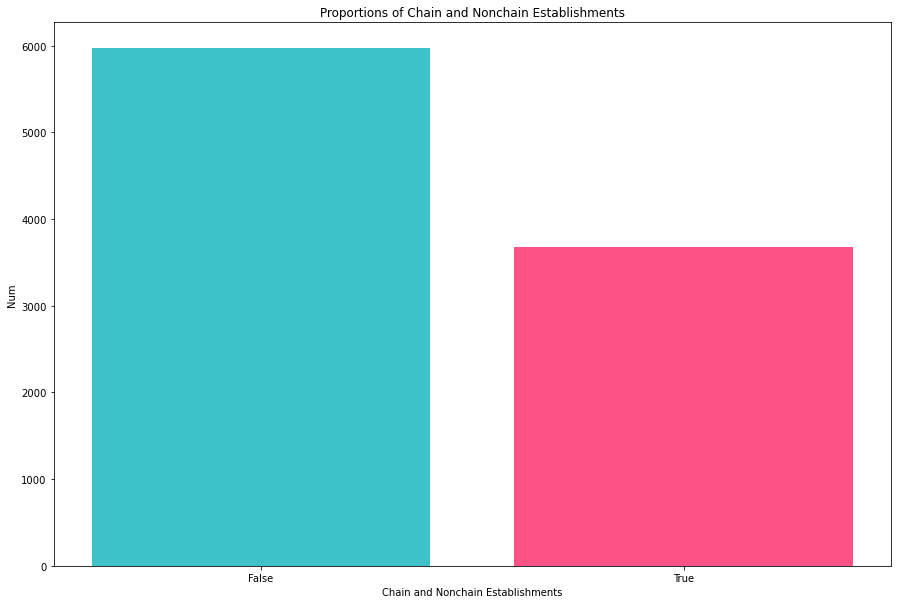

In [21]:
fig = plt.subplots(figsize=(15, 10))
plt.bar(chain_grouped['chain'],chain_grouped['num'], color = ['#3FC1C9', '#FC5185'])
plt.title('Proportions of Chain and Nonchain Establishments')
plt.xlabel('Chain and Nonchain Establishments')
plt.ylabel('Num')
plt.xticks(np.arange(2), chain_grouped['chain'])
plt.show()

So it seems that non-chain restaurants are more popular in LA. It's a very important and positive metric for the city of LA because it means that the door for the restaurant business in the city is open for everybody, and not only the strong and already established chains. This increases the competition and makes all the players in the culinary arena always strive to give better service and products to customers - Which is a great thing because the customer gets better and tastier food for a lower price.🙌😀

**3. Which type of establishment is typically a chain?**

Let's build the relevant data set first.

In [22]:
chain_esta_grouped = rest.groupby(['chain', 'object_type'])['id'].nunique().reset_index()
chain_esta_grouped.columns = ['chain', 'object_type', 'num']
chain_esta_grouped

,chain,object_type,num
0,False,bar,215
1,False,cafe,169
2,False,fast food,461
3,False,pizza,166
4,False,restaurant,4961
5,True,bakery,283
6,True,bar,77
7,True,cafe,266
8,True,fast food,605
9,True,pizza,153


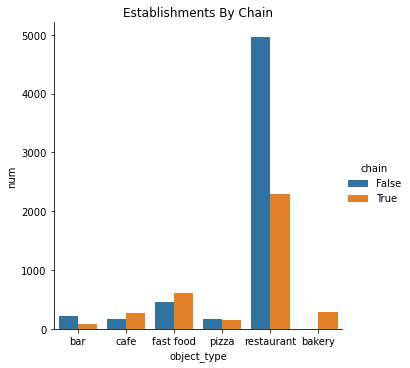

In [23]:
sns.catplot(x="object_type", y="num", hue="chain", kind="bar", data=chain_esta_grouped)
plt.title('Establishments By Chain')
plt.show()

Here we see that restaurant is the establishment type that is most likely to be a chain. Also, it seems that bakery is an "only chain" establishment. People don't open a bakery unless it's a franchise. 

**4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?**

First, let's create the right data set.

In [24]:
chain = rest.query('chain == True')
chain.head()

,id,object_name,address,chain,object_type,number
8,11794,abc donuts,3027 n san fernando rd unit 103,True,fast food,1
10,11796,el pollo loco,5319 w sunset blvd,True,restaurant,38
11,11797,poong nyun bakery,928 s western ave ste 109,True,bakery,17
12,11798,emc restaurant group llc,3500 w 6th st ste 101,True,restaurant,133
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,bakery,26


In [25]:
chain_seat_grouped = chain.groupby('object_name')['number'].agg(['count', 'median']).reset_index()
chain_seat_grouped.columns = ['name', 'num', 'average_seats']
chain_seat_grouped

,name,num,average_seats
0,#1 chinese fast food,1,6.0
1,1810 restaurant,1,45.0
2,333,1,180.0
3,3rd st market & deli,1,7.0
4,4 caminos restaurant,1,18.0
...,...,...,...
2728,zankou chicken,2,53.5
2729,zen bakery (retail),1,19.0
2730,zermenos restaurant inc,1,10.0
2731,zion market deli & island,1,16.0


Now let's plot a scatter plot to answer the question.

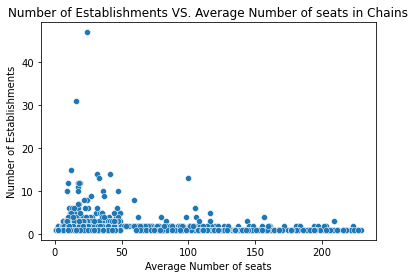

In [26]:
sns.scatterplot(data =chain_seat_grouped, x = 'average_seats', y = 'num')
plt.title('Number of Establishments VS. Average Number of seats in Chains')
plt.xlabel('Average Number of seats')
plt.ylabel('Number of Establishments')
plt.show()

Here we see that we don't have many establishments, up to 10, when the number of seats varies, from 0 to up to 200. So basically there is no pattern that we can point to it. We only can say that chains establish up to 10 branches in LA with a variety of seats number, it can be a very small branch with 5 places to seat, and it can be a big branch with 100 seats. 

**5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot
graphs.**

As always, let's create the relevant data set.

In [27]:
seats_esta = rest.groupby('object_type')['number'].median().reset_index()
seats_esta

,object_type,number
0,bakery,18.0
1,bar,28.5
2,cafe,21.0
3,fast food,21.0
4,pizza,19.0
5,restaurant,29.0


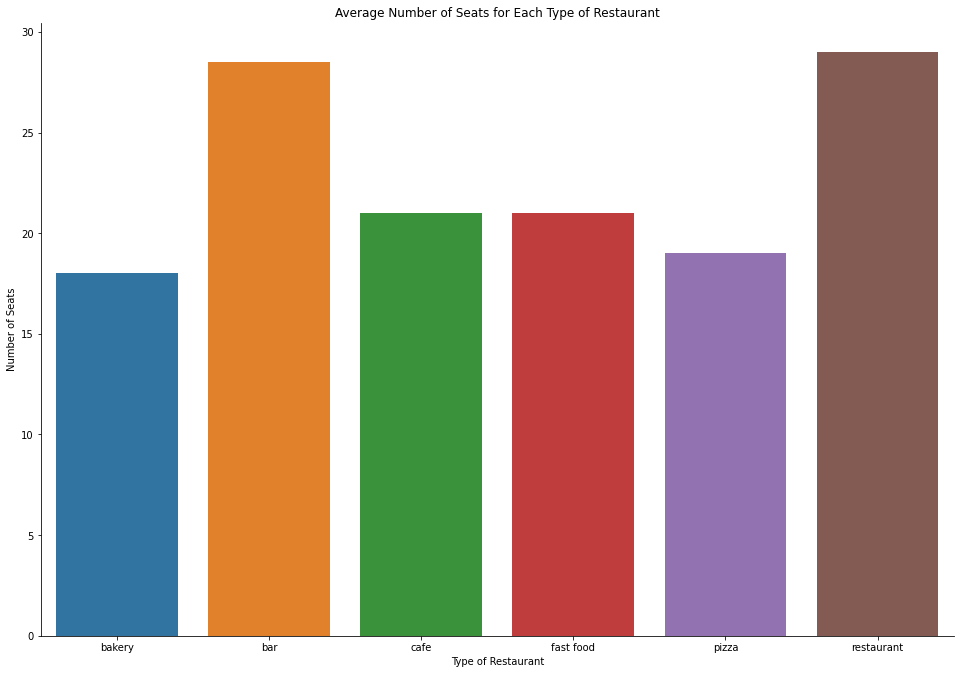

In [28]:
g=sns.catplot(x="object_type", y="number", kind="bar", data=seats_esta)
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
plt.title('Average Number of Seats for Each Type of Restaurant')
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of Seats')
plt.show()

The graph tells us that restaurants and bars are the 'most seated' establishments and after them follows cafe and fast-food restaurants. This makes sense because people tend to spend more time in restaurants and bars, even if they finished eating and drinking (example - a lovely date between an in-love couple, or a very fun family meeting where all the family meets after a long time no seen). So if the restaurant and the bar want to keep the profit stable, they need more seating places, to increase the chance that there will be a table for new clients. 

**6. Put the data on street names from the address column in a separate column.**

Let's build a function that does it for us with the help of usaddress library. The library is not perfect, so first, we will build a function that will locate the 'problematic' rows that don't contain streets or numbers. Then we will examine the output and decide what is the best solution.

In [29]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [30]:
rest['clean_street_check']=rest.address.apply(cleaning_check)

In [31]:
rest[rest['clean_street_check']=='no street or number']


,id,object_name,address,chain,object_type,number,clean_street_check
1888,13674,magdaleno debbie,olvera st e17,False,restaurant,15,no street or number
3719,15505,las anitas,olvera st 26,False,restaurant,38,no street or number
7003,18789,d.k. donuts,1033 1/2 los angeles st,False,fast food,8,no street or number
7281,19067,cielito lindo,olvera st 23,False,restaurant,2,no street or number
7319,19105,juanita's cafe,olvera st 20,False,restaurant,12,no street or number
7321,19107,kitty's snow cones,olvera st 2,False,restaurant,11,no street or number
7327,19113,la noche buena,olvera st e8,False,restaurant,1,no street or number
7438,19224,la golondrina,olvera st w17,False,restaurant,204,no street or number
7741,19527,rodolfo's restaurant,olvera st 5,True,restaurant,4,no street or number


It's our lucky day!

It's only 2 streets: olvera st and 1033 1/2 los angeles st. 

In [32]:
usaddress.parse(rest.iloc[1888]['address'])

[('olvera', 'PlaceName'), ('st', 'StateName'), ('e17', 'ZipCode')]

o.k!

The library treats olevera as PlaceName and not as a street name. We will take care of it in the function. 

In [33]:
def cleaning_final(raw):
    if raw.startswith('olvera'):
        clean_adress='olvera,los angeles,usa'
    elif raw.startswith('1033 1/2 los angeles'):
        clean_adress='los angeles st,los angeles,usa'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

In [34]:
rest['clean_street_final']=rest.address.apply(cleaning_final)
rest.sample(10)

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
7292,19078,"giggles ""n"" hugs",10250 santa monica blvd ste #155,False,restaurant,87,"10250,monica","monica, Los Angeles,USA"
9305,21091,the coffee bean & tea leaf,500 world way t5,True,cafe,21,"500,world","world, Los Angeles,USA"
9534,21320,vermont music studio,191 s vermont ave,False,restaurant,8,"191,vermont","vermont, Los Angeles,USA"
8173,19959,coffee bean & tea leaf,600 world way #6,True,cafe,11,"600,world","world, Los Angeles,USA"
4979,16765,fred jordan mission,445 towne ave,False,restaurant,116,"445,towne","towne, Los Angeles,USA"
511,12297,bonaventure bake shop,404 s figueroa st,False,restaurant,26,"404,figueroa","figueroa, Los Angeles,USA"
5843,17629,penthouse lounge,1347 s atlantic blvd,False,restaurant,81,"1347,atlantic","atlantic, Los Angeles,USA"
5307,17093,vaka burger express,2765 e olympic blvd,False,fast food,14,"2765,olympic","olympic, Los Angeles,USA"
1691,13477,don carlos village restaurant,2046 w pico blvd,True,restaurant,68,"2046,pico","pico, Los Angeles,USA"
8744,20530,subway #24017,1821 e cesar e chavez st,True,fast food,18,"1821,cesar","cesar, Los Angeles,USA"


Yay!

We managed to put the street names from the address column in a separate column. 

**7. Plot a graph of the top ten streets by number of restaurants.**

As we always do, first let's create the relevant data set.

In [35]:
street_rest = rest.groupby('clean_street_final')['object_name'].count().reset_index()
street_rest.columns = ['street', 'num_rest']
top_ten_street = street_rest.sort_values(by = 'num_rest', ascending = False).head(10)
top_ten_street

,street,num_rest
388,"sunset, Los Angeles,USA",405
439,"wilshire, Los Angeles,USA",398
336,"pico, Los Angeles,USA",371
431,"western, Los Angeles,USA",369
174,"figueroa, Los Angeles,USA",334
320,"olympic, Los Angeles,USA",309
409,"vermont, Los Angeles,USA",288
296,"monica, Los Angeles,USA",264
22,"3rd, Los Angeles,USA",262
221,"hollywood, Los Angeles,USA",254


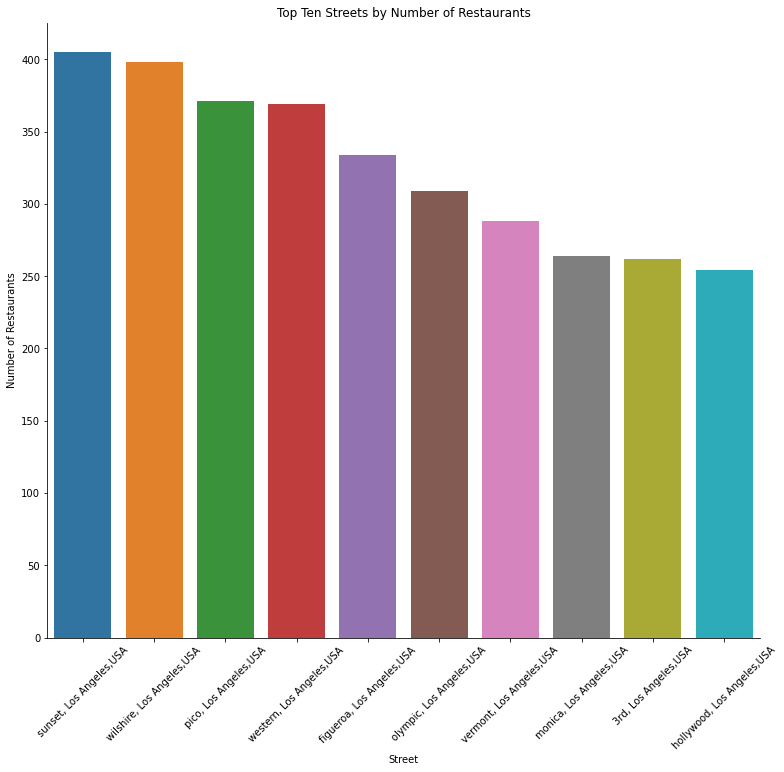

In [36]:
g= sns.catplot(x="street", y="num_rest", kind="bar", data=top_ten_street)
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
plt.title('Top Ten Streets by Number of Restaurants')
plt.xlabel('Street')
plt.ylabel('Number of Restaurants')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

The graph shows us that Sunset street and Wilshire street are the 2 leading streets that have the largest amount of restaurants. 

Sunset street and Wilshire street seem to be the most popular and demanded places in LA to open a restaurant. Maybe these streets have very good urban characteristics which attract the food industry to them. If I wanted to open a restaurant, these 2 streets definitely were my 2 leading places to do so.

**8. Find the number of streets that only have one restaurant.**

To answer this question we will use one of the data sets that we built in the previous step.

In [37]:
one_rest = len(street_rest.query('num_rest == 1'))
total_rest = len(street_rest)
perce = one_rest/total_rest
print('Number of streets that only have one restaurant:', one_rest)
print('Total number of streets that have restaurants:', total_rest)
print('Percentage of st. with one restaurant of total st. with restaurants:{:.2%}'.format(perce))

Number of streets that only have one restaurant: 179
Total number of streets that have restaurants: 453
Percentage of st. with one restaurant of total st. with restaurants:39.51%


So here we see that 179 streets have only one restaurant, which is 39.51% of the total amount of streets that have restaurants. Most of the streets in LA have 2 or more restaurants - that's excellent!. 

**9. For streets with a lot of restaurants, look at the distribution of the number
of seats. What trends can you see?**

First, like always, let's build the right data set.

In [38]:
top_rest_seat = rest[rest['clean_street_final'].isin(top_ten_street['street'])]
top_rest_seat.head()

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,"6801,hollywood","hollywood, Los Angeles,USA"
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,"1814,sunset","sunset, Los Angeles,USA"
10,11796,el pollo loco,5319 w sunset blvd,True,restaurant,38,"5319,sunset","sunset, Los Angeles,USA"
11,11797,poong nyun bakery,928 s western ave ste 109,True,bakery,17,"928,western","western, Los Angeles,USA"
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,bakery,26,"2501,sunset","sunset, Los Angeles,USA"


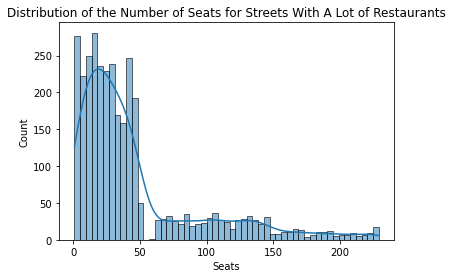

In [39]:
sns.histplot(data=top_rest_seat, x="number", kde=True)
plt.title('Distribution of the Number of Seats for Streets With A Lot of Restaurants')
plt.xlabel('Seats')
plt.show()

Let's calculate the average number of seats in the most popular streets. The histogram shows us that there are outliers which means that they are pooling the mean up. So, the right metric to use for calculating the average seat number is the median which is resistant to outliers.

In [40]:
median_top_rest_seat = top_rest_seat.number.median()
print('The average seat number of the most popular streets:', median_top_rest_seat)

The average seat number of the most popular streets: 29.0


In [41]:
top_rest_seat.number.mean()

45.584204056545786

The mean and the median vary significantly. This makes sense due to the outliers that we saw in the histogram earlier. 

Let's remove the outliers and plot a new histogram and calculate the mean and median again with the clean data.

In [42]:
top_rest_seat_clean = top_rest_seat.query('number <=50')
top_rest_seat_clean.head()

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,"6801,hollywood","hollywood, Los Angeles,USA"
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,"1814,sunset","sunset, Los Angeles,USA"
10,11796,el pollo loco,5319 w sunset blvd,True,restaurant,38,"5319,sunset","sunset, Los Angeles,USA"
11,11797,poong nyun bakery,928 s western ave ste 109,True,bakery,17,"928,western","western, Los Angeles,USA"
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,bakery,26,"2501,sunset","sunset, Los Angeles,USA"


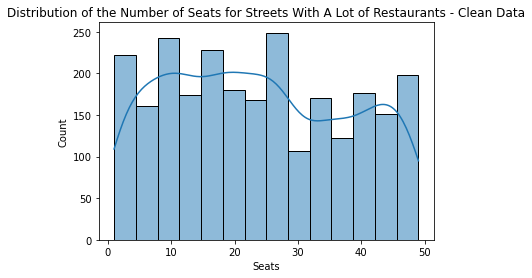

In [43]:
sns.histplot(data=top_rest_seat_clean, x="number", kde=True)
plt.title('Distribution of the Number of Seats for Streets With A Lot of Restaurants - Clean Data')
plt.xlabel('Seats')
plt.show()

In [44]:
median_top_rest_seat_clean = top_rest_seat_clean.number.median()
print('The median seat number of the most popular streets:', median_top_rest_seat_clean)

The median seat number of the most popular streets: 23.0


In [45]:
mean_top_rest_seat_clean=top_rest_seat_clean.number.mean()
print('The mean seat number of the most popular streets:', mean_top_rest_seat_clean)

The mean seat number of the most popular streets: 23.749411764705883


Yay!

After removing the outliers we got mean and median that are very close one to another - That's great! It means that the clean data that we got now is not skewed.

The histogram tells us that most of the restaurants in streets with a lot of restaurants have only up to 40-50 seats. Only small numbers have 50 seats and above. That makes sense because probably the rent in these streets is very expensive, so most of the owners can't afford big restaurants. Also, maybe the municipality has a policy of small restaurants in these popular streets, so more people will have the chance to open a restaurant there.

Just for curiosity, let's check the distribution in the 2 most popular streets.

In [46]:
seat_monica_3rd = top_rest_seat_clean.query('clean_street_final == "sunset, Los Angeles,USA" or clean_street_final == "wilshire, Los Angeles,USA"')
seat_monica_3rd.head()

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,"1814,sunset","sunset, Los Angeles,USA"
10,11796,el pollo loco,5319 w sunset blvd,True,restaurant,38,"5319,sunset","sunset, Los Angeles,USA"
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,bakery,26,"2501,sunset","sunset, Los Angeles,USA"
22,11808,camy's grill,3339 wilshire blvd,False,restaurant,39,"3339,wilshire","wilshire, Los Angeles,USA"
33,11819,ono hawaiian bbq,5539 w sunset blvd,True,restaurant,35,"5539,sunset","sunset, Los Angeles,USA"


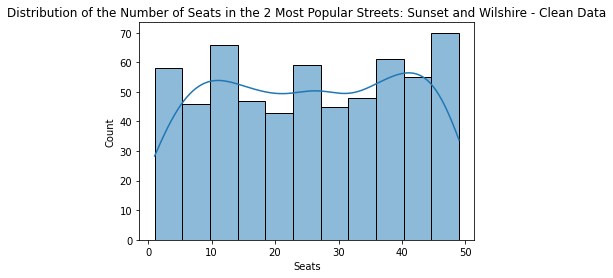

In [47]:
sns.histplot(data=seat_monica_3rd, x="number", kde=True)
plt.title('Distribution of the Number of Seats in the 2 Most Popular Streets: Sunset and Wilshire - Clean Data')
plt.xlabel('Seats')
plt.show()

In [48]:
seat_monica_3rd.number.median()

26.0

In [49]:
seat_monica_3rd.number.mean()

25.58695652173913

The numbers are pretty much the same. 

Great!

### Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

* First, we would recommend placing the establishment in one of the following streets: 

1. Sunset st.
2. Wilshire st.

These 2 streets have the biggest amount of restaurants, which shows that these streets have economic power and conditions that lead to success in the field of restaurants, and this is exactly what we are looking for.

* Secondly, in the coffee industry (which is our industry), most of the establishments are chain establishments, while establishments of restaurants type are the most non-chain establishment. So here we would recommend  2 ways of action to maintain the profit of the coffee house:

1. To grow and become a chain, or alternatively become a franchisee of one of the chains. 

2. To change the establishment type from coffee house to restaurant type which seems to be the most demanded establishment type, and also not-chain type. In the restaurant industry, it's easier to succeed if you are not a chain restaurant, which means that you can succeed by the uniqueness of your restaurant - and that's exactly what we offer - a unique restaurant with little robot waiters.

* We recommend maintaining set the number of seats to be around 25 - this is the average number of seats in most of the establishments in the 2 most popular streets Sunset and Wilshire. 